In [1]:
import os
from pybedtools import BedTool
import pandas as pd
import seaborn as sns
indir = '/home/hsher/scratch/circ_nextera_iter2/output/'
circ_quant_output = [os.path.join(indir,f) for f in os.listdir(indir) if f.endswith('.gtf')]
indir = '/home/hsher/scratch/circ_truseq_iter2/output/'
circ_quant_output += [os.path.join(indir,f) for f in os.listdir(indir) if f.endswith('.gtf')]
indir = '/home/hsher/scratch/circ_nextera/output/'
circ_quant_output += [os.path.join(indir,f) for f in os.listdir(indir) if f.endswith('.gtf')]
indir = '/home/hsher/scratch/circ_truseq/output/'
circ_quant_output += [os.path.join(indir,f) for f in os.listdir(indir) if f.endswith('.gtf')]
indir = '/home/hsher/scratch/circSTAMP_iter1/output'
circ_quant_output += [os.path.join(indir,f) for f in os.listdir(indir) if f.endswith('.gtf')]

In [2]:
circ_quant_output

['/home/hsher/scratch/circ_nextera_iter2/output/HEK_JC_rar11.gtf',
 '/home/hsher/scratch/circ_nextera_iter2/output/Exo05.gtf',
 '/home/hsher/scratch/circ_nextera_iter2/output/HEK_rar11.gtf',
 '/home/hsher/scratch/circ_nextera_iter2/output/EV_rar11.gtf',
 '/home/hsher/scratch/circ_nextera_iter2/output/TOB2_rar11.gtf',
 '/home/hsher/scratch/circ_nextera_iter2/output/Exo10.gtf',
 '/home/hsher/scratch/circ_truseq_iter2/output/EV_rz.gtf',
 '/home/hsher/scratch/circ_truseq_iter2/output/HEK_rar.gtf',
 '/home/hsher/scratch/circ_truseq_iter2/output/TOB2_rz.gtf',
 '/home/hsher/scratch/circ_truseq_iter2/output/HEK_JC_rar.gtf',
 '/home/hsher/scratch/circ_truseq_iter2/output/RBM15_rz.gtf',
 '/home/hsher/scratch/circ_nextera/output/circseq-bm-rar19-nxt.gtf',
 '/home/hsher/scratch/circ_nextera/output/circseq-bm-rar11-nxt.gtf',
 '/home/hsher/scratch/circ_truseq/output/circseq-bm-rar.gtf',
 '/home/hsher/scratch/circ_truseq/output/circseq-bm-arr.gtf',
 '/home/hsher/scratch/circ_truseq/output/circseq-bm-

In [3]:
def read_ciri_gtf(fname):
    bed = BedTool(fname)
    df = bed.to_dataframe()
    # filter for non-entries
    stat = df.loc[df['seqname'].str.contains('##'), 'seqname'].str.split(': ', expand = True)
    df = df.loc[~df['seqname'].str.contains('##')].reset_index()
    
    # get attributes
    attrs = pd.DataFrame([i.attrs for i in bed])
    
    return pd.concat([df, attrs], axis = 1), stat

In [4]:
circ_type_count = []
names = []
junc_ratio_tbl = []
bsj_ratio_tbl = []
fsj_ratio_tbl = []
stats = []
for fname in circ_quant_output:
    name = os.path.basename(fname).replace('.gtf', '')
    names.append(name)
    
    circ_df, stat = read_ciri_gtf(fname)
    
    circ_type_count.append(circ_df['circ_type'].value_counts())
    
    junc_ratio_tbl.append(circ_df.set_index('circ_id')['junc_ratio'].astype(float))
    bsj_ratio_tbl.append(circ_df.set_index('circ_id')['bsj'].astype(float))
    fsj_ratio_tbl.append(circ_df.set_index('circ_id')['fsj'].astype(float))
    stats.append(stat.set_index(0))

In [5]:
stats_df = pd.concat(stats, axis = 1).T

In [6]:
for col in ['##Total_Reads', '##Mapped_Reads', '##Circular_Reads']:
    stats_df[col] = stats_df[col].astype(int)

In [7]:
stats_df['frac_circular'] = stats_df['##Circular_Reads']/stats_df['##Mapped_Reads']
stats_df['frac_mapped'] = stats_df['##Mapped_Reads']/stats_df['##Total_Reads']

In [8]:
stats_df.sort_values('frac_circular')
stats_df.set_index('##Sample', inplace = True)

In [9]:
rename_dict = {'HEK_JC_rar11':'rar11_JC_rep2', 
               'Exo05': 'Exo05', 
               'Exo10': 'Exo10',
               'HEK_rar11': 'rar11_rep2', 
               'EV_rar11': 'rar11_rep2-EV', 
               'TOB2_rar11': 'rar11_rep2-TOB2',
               'EV_rz': 'rz-EV', 
               'HEK_rar': 'rar_rep2', 
               'TOB2_rz': 'rz-TOB2', 
               'HEK_JC_rar': 'rar_JC', 
               'RBM15_rz': 'rz-RBM15',
               'circseq-bm-rar19-nxt': 'rar19', 
               'circseq-bm-rar11-nxt': 'rar11_rep1', 
               'circseq-bm-rar': 'rar_rep1',
               'circseq-bm-arr': 'arr', 
               'circseq-bm-rz': 'rz_rep1', 
               'APO-50-A': 'polyA-APO-50', 
               'APO-50-R': 'RNase-APO-50', 
               'HuR-noD-A': 'polyA-HuR-0',
               'HuR-50-R': 'RNase-HuR-0', 
               'HuR-1-A': 'polyA-HuR-1000', 
               'APO-noD-R': 'RNase-APO-0', 
               'HuR-1-R': 'RNase-HuR-1000', 
               'APO-1-R': 'RNase-APO-1000',
               'APO-noD-A': 'polyA-APO-0'}

In [10]:
group_color = {'rar11_JC': 'tomato',
              'rar11': 'orange',
              
              'rz': 'mediumorchid', 
              'rar': 'seagreen',
               'rar_JC': 'limegreen',
              'arr': 'royalblue'}

In [11]:
import numpy as np
stats_df['##Total_Reads'].apply(np.log10)

##Sample
HEK_JC_rar11            8.545027
Exo05                   8.066133
HEK_rar11               8.459924
EV_rar11                8.483790
TOB2_rar11              8.358693
Exo10                   8.105363
EV_rz                   7.868790
HEK_rar                 7.727253
TOB2_rz                 7.785839
HEK_JC_rar              7.477849
RBM15_rz                7.758271
circseq-bm-rar19-nxt    8.204429
circseq-bm-rar11-nxt    8.528204
circseq-bm-rar          8.011112
circseq-bm-arr          8.063943
circseq-bm-rz           8.283560
APO-50-A                8.131649
APO-50-R                8.312222
HuR-noD-A               8.128705
HuR-50-R                8.138663
HuR-1-A                 7.909702
APO-noD-R               8.313501
HuR-1-R                 8.319139
APO-1-R                 8.268915
APO-noD-A               8.195244
Name: ##Total_Reads, dtype: float64

In [12]:
stats_df = stats_df.rename(rename_dict).sort_index()

In [13]:
figure1_sets = [ 
              'rz_rep1','rz-EV',
             'arr',
              'rar_rep1', 'rar_rep2',
            'rar_JC',
              'rar11_rep1','rar11_rep2', 'rar11_rep2-EV',
              'rar11_JC_rep2'
             ]

In [14]:
figure1_colors = [group_color[c.split('-')[0].split('_rep')[0]] for c in figure1_sets]

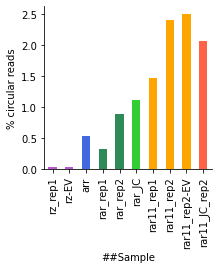

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
(stats_df.loc[figure1_sets, 'frac_circular']*100).plot.bar(
    color = figure1_colors, figsize = (3,3))
plt.ylabel('% circular reads')
sns.despine()

In [16]:
counts = pd.concat(circ_type_count, axis = 1)
counts.columns = [rename_dict[c] for c in names]

In [17]:
bsj = pd.concat(bsj_ratio_tbl, axis = 1)
bsj.columns = [rename_dict[c] for c in names]

In [18]:
fsj = pd.concat(fsj_ratio_tbl, axis = 1)
fsj.columns = [rename_dict[c] for c in names]

In [19]:
junc = pd.concat(junc_ratio_tbl, axis = 1)
junc.columns = [rename_dict[c] for c in names]

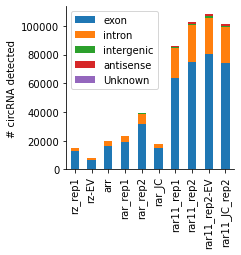

In [22]:

counts.loc[:, figure1_sets].T.plot.bar(stacked = True, figsize = (3,3))
plt.ylabel('# circRNA detected')
sns.despine()

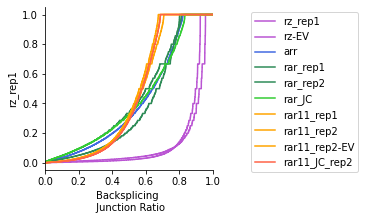

In [23]:
f, ax = plt.subplots(figsize = (3,3))
for col, color in zip(figure1_sets, figure1_colors):
    ax = sns.ecdfplot(data =junc[col].to_frame(), y = col, ax = ax, label = col, color = color)
    ax.set_xlabel('Backsplicing \n Junction Ratio')
ax.legend(bbox_to_anchor = (1.2,1))
#sns.move_legend(ax, "center right")
sns.despine()

# Accuracy

In [24]:
circname = {}
for fname in circ_quant_output:
    name = rename_dict[os.path.basename(fname).replace('.gtf', '')]
    circ_df, stat = read_ciri_gtf(fname)
    circname[name] = set(circ_df['circ_id'])

In [25]:
rar11_reproducible = circname['rar11_rep2'].intersection(circname['rar11_rep1'])
rar_reproducible = circname['rar_rep1'].intersection(circname['rar_rep2'])
rz_reproducible = circname['rz_rep1'].intersection(circname['rz-EV'])

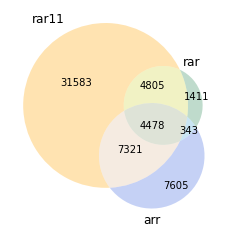

In [26]:
from matplotlib_venn import venn3
venn3([rar11_reproducible, rar_reproducible, circname['arr']]
      , set_labels = ('rar11', 'rar', 'arr'), 
      set_colors = (group_color['rar11'], group_color['rar'], group_color['arr']),
      alpha = 0.3
     )

<AxesSubplot:>

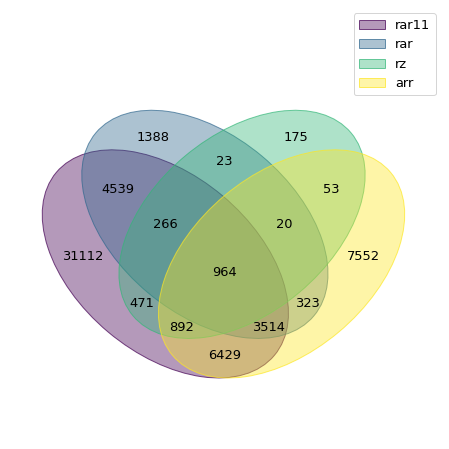

In [27]:
from venn import venn
venn({'rar11': rar11_reproducible,
     'rar': rar_reproducible,
      'rz': rz_reproducible,
      'arr': circname['arr']
     })

In [28]:
from scipy.stats import pearsonr
def get_pearsonr_dropna(df, col1, col2):
    sub = df[[col1, col2]].dropna()
    r,p=pearsonr(sub[col1], sub[col2])
    return r,p

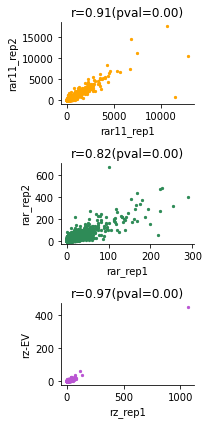

In [29]:
f, ax = plt.subplots(3,1, figsize = (3,6))
from scipy.stats import pearsonr
bsj.plot.scatter(x = 'rar11_rep1', y = 'rar11_rep2', ax = ax[0], 
                 color = group_color['rar11'], marker = '.')
r,p = get_pearsonr_dropna(bsj, 'rar11_rep1', 'rar11_rep2')
ax[0].set_title(f'r={r:.2f}(pval={p:.2f})')

bsj.plot.scatter(x = 'rar_rep1', y = 'rar_rep2', ax = ax[1], color = group_color['rar'], marker = '.')
r,p = get_pearsonr_dropna(bsj, 'rar_rep1', 'rar_rep2')
ax[1].set_title(f'r={r:.2f}(pval={p:.2f})')

bsj.plot.scatter(x = 'rz_rep1', y = 'rz-EV', ax = ax[2], color = group_color['rz'], marker = '.')
r,p = get_pearsonr_dropna(bsj, 'rz_rep1', 'rz-EV')
ax[2].set_title(f'r={r:.2f}(pval={p:.2f})')

plt.tight_layout()
sns.despine()

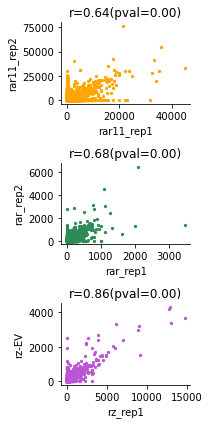

In [30]:
f, ax = plt.subplots(3,1, figsize = (3,6))
from scipy.stats import pearsonr
fsj.plot.scatter(x = 'rar11_rep1', y = 'rar11_rep2', ax = ax[0], 
                 color = group_color['rar11'], marker = '.')
r,p = get_pearsonr_dropna(fsj, 'rar11_rep1', 'rar11_rep2')
ax[0].set_title(f'r={r:.2f}(pval={p:.2f})')

fsj.plot.scatter(x = 'rar_rep1', y = 'rar_rep2', ax = ax[1], color = group_color['rar'], marker = '.')
r,p = get_pearsonr_dropna(fsj, 'rar_rep1', 'rar_rep2')
ax[1].set_title(f'r={r:.2f}(pval={p:.2f})')

fsj.plot.scatter(x = 'rz_rep1', y = 'rz-EV', ax = ax[2], color = group_color['rz'], marker = '.')
r,p = get_pearsonr_dropna(fsj, 'rz_rep1', 'rz-EV')
ax[2].set_title(f'r={r:.2f}(pval={p:.2f})')

plt.tight_layout()
sns.despine()

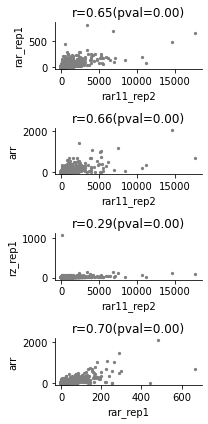

In [38]:
f, ax = plt.subplots(4,1, figsize = (3,6))
from scipy.stats import pearsonr
bsj.plot.scatter(x = 'rar11_rep2', y = 'rar_rep1', ax = ax[0], color = 'grey', marker = '.')
r,p = get_pearsonr_dropna(bsj, 'rar11_rep1', 'rar_rep2')
ax[0].set_title(f'r={r:.2f}(pval={p:.2f})')

bsj.plot.scatter(x = 'rar11_rep2', y = 'arr', ax = ax[1], color = 'grey', marker = '.')
r,p = get_pearsonr_dropna(bsj, 'rar11_rep2', 'arr')
ax[1].set_title(f'r={r:.2f}(pval={p:.2f})')

bsj.plot.scatter(x = 'rar11_rep2', y = 'rz_rep1', ax = ax[2], color = 'grey', marker = '.')
r,p = get_pearsonr_dropna(bsj, 'rar11_rep2', 'rz_rep1')
ax[2].set_title(f'r={r:.2f}(pval={p:.2f})')

bsj.plot.scatter(x = 'rar_rep1', y = 'arr', ax = ax[3], color = 'grey', marker = '.')
r,p = get_pearsonr_dropna(bsj, 'rar_rep1', 'arr')
ax[3].set_title(f'r={r:.2f}(pval={p:.2f})')

plt.tight_layout()
sns.despine()

In [32]:
from pathlib import Path
indir = Path('/home/hsher/scratch/circ_nextera/')
indir2 = Path('/home/hsher/scratch/circ_truseq/')
star_log1 = pd.read_csv(indir/'QC/genome_mapping_stats.csv')
star_log2 = pd.read_csv(indir2/'QC/genome_mapping_stats.csv')
star_log = pd.concat([star_log1, star_log2], axis = 0)
star_log.index = star_log['STAR Log filename'].apply(lambda x: x.split('/')[-1].replace('.Log.final.out',''))
star_log.sort_index(inplace = True)

Text(0.5, 0, 'fraction circular RNA reads')

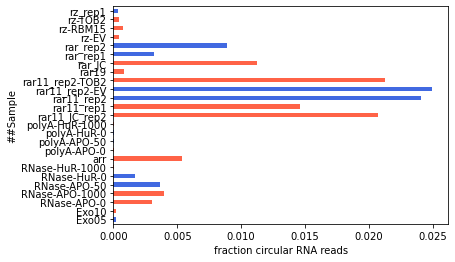

In [33]:
stats_df['frac_circular'].plot.barh(color = ['tomato' if 'rar' in index else 'royalblue' for index in star_log.index])
plt.xlabel('fraction circular RNA reads')

In [34]:
total_stat = pd.concat([stats_df,star_log], axis = 1)

In [35]:
total_stat

,##Total_Reads,##Mapped_Reads,##Circular_Reads,##version,frac_circular,frac_mapped,Unnamed: 0,Started job on,Started mapping on,Finished on,...,Number of reads unmapped: too many mismatches,% of reads unmapped: too many mismatches,Number of reads unmapped: too short,% of reads unmapped: too short,Number of reads unmapped: other,% of reads unmapped: other,CHIMERIC READS:,Number of chimeric reads,% of chimeric reads,STAR Log filename
Exo05,116448244.0,15410366.0,3004.0,1.1.2,0.000195,0.132337,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exo10,127456780.0,20087518.0,4028.0,1.1.2,0.000201,0.157603,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RNase-APO-0,205826174.0,190615070.0,568286.0,1.1.2,0.002981,0.926097,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RNase-APO-1000,185744150.0,160983100.0,637428.0,1.1.2,0.003960,0.866693,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RNase-APO-50,205221092.0,187215432.0,675314.0,1.1.2,0.003607,0.912262,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RNase-HuR-0,137614052.0,120300838.0,205176.0,1.1.2,0.001706,0.874190,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RNase-HuR-1000,208515592.0,179866002.0,4708.0,1.1.2,0.000026,0.862602,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arr,115862476.0,100933122.0,542382.0,1.1.2,0.005374,0.871146,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
polyA-APO-0,156763026.0,150708334.0,5664.0,1.1.2,0.000038,0.961377,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
polyA-APO-50,135409346.0,131074750.0,4844.0,1.1.2,0.000037,0.967989,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# let's find mapped to ribosomal RNA
gencode_coords[0].attrs

NameError: name 'gencode_coords' is not defined

In [ ]:
from pybedtools import BedTool
gencode_coords = BedTool('/home/hsher/gencode_coords/gencode.v35.basic.annotation.gff3')
rRNA_regions = gencode_coords.filter(lambda region: region[2]=='gene' and 'rRNA' in region.attrs['gene_type']).saveas()

In [ ]:
len(rRNA_regions)

In [ ]:
len(rRNA_regions.merge(s = True)) # make sure no overlap

In [ ]:
genome_align_ciri_bams = list((indir / 'output'/'align').glob('*.bam'))
genome_align_ciri_bams += list((indir2 / 'output'/'align').glob('*.bam'))


In [ ]:
genome_align_ciri_bams = [str(f) for f in genome_align_ciri_bams]

In [ ]:
rRNA_cov = rRNA_regions.multicov(bams = genome_align_ciri_bams, s = True) # strandedness = True, proper pair = True

In [ ]:
libnames = [os.path.basename(f).split('.')[0] for f in genome_align_ciri_bams]
rRNA_cov_df = rRNA_cov.to_dataframe(names = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attributes']+
                                   libnames)

In [ ]:
rRNA_cov_df.head()

In [ ]:
rRNA_cov_df[libnames].sum()

In [ ]:
import pysam
pysam.AlignmentFile(genome_align_ciri_bams[0]).mapped

In [ ]:
genome_mapped = [pysam.AlignmentFile(f).mapped for f in genome_align_ciri_bams]

In [ ]:
dict(zip(libnames, genome_mapped))

In [ ]:
total_stat['genome_mapped_HISAT']=total_stat.index.map(dict(zip(libnames, genome_mapped))).tolist()

In [ ]:
total_stat.plot.scatter(x = '##Mapped_Reads', y = 'genome_mapped_HISAT')

In [ ]:
total_stat['genome_mapped_HISAT']

In [ ]:
total_stat[['Number of reads mapped to too many loci','##Mapped_Reads','##Circular_Reads']]

In [ ]:
(total_stat['Number of reads mapped to too many loci']/total_stat['##Mapped_Reads']).plot.barh(
color = ['tomato' if 'rar' in index else 'royalblue' for index in star_log.index])

plt.xlabel('STAR multimap / HISAT mapped')

In [ ]:
(total_stat['##Circular_Reads']/(total_stat['##Mapped_Reads']-total_stat['Number of reads mapped to too many loci'])).plot.barh(
color = ['tomato' if 'rar' in index else 'royalblue' for index in star_log.index])

plt.xlabel('estimated of circRNA fraction post Jumpcode removal')

In [ ]:
(rRNA_cov_df[libnames].sum()/total_stat['genome_mapped_HISAT']).plot.barh(color = ['tomato' if 'rar' in index else 'royalblue' for index in star_log.index])
plt.xlabel('% aligning to rRNA based on HISAT alignment')

In [ ]:
rRNA_cov_df[['gene_type', 'gene_name']]=rRNA_cov_df['attributes'].str.split(';', expand = True)[[2,3]]

In [ ]:
rRNA_cov_df.groupby('gene_type')[libnames].sum()

In [ ]:
rRNA_cov_df.loc[rRNA_cov_df['gene_type']=='gene_type=rRNA']

In [ ]:
rRNA_cov_df.loc[rRNA_cov_df['gene_name'].str.contains('5S')]

In [ ]:
rRNA_cov_df['gene_name'].str.replace('gene_name=', '').unique()

In [ ]:
rRNA_cov_df['gene_name']

In [ ]:
total_stat.plot.scatter(x = '##Mapped_Reads', y = 'Uniquely mapped reads number')